In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates

In [163]:
df = pd.read_csv("D:/Data Analysis/Files/export.csv")

In [164]:
print("Total reported days:", len(df))

Total reported days: 1828


In [165]:
# I want to drop columns which are empty
df.drop(columns=['snow', 'wdir', 'snow', 'wdir', 'wpgt', 'tsun'], inplace=True) # Manually dropping empty columns
df.dropna(how='all', inplace=True, axis=1)  # Alternative way to drop empty columns

In [166]:
# Removing unrealistic values like from the 'prcp' column
df = df[df['prcp'] < 40]
print(len(df))

1062


In [167]:
fake_rows = df[
    (df['tavg'] == df['tmax']) &
    (df['tmax'] == df['tmin']) &
    (df['prcp'] > 50)
]

In [168]:
#counting duplicate values
print(len(df))
df["tmax"] = df["tmax"].drop_duplicates()
print(len(df))

1062
1062


In [169]:
df["date"] = pd.to_datetime(df["date"])
print(df.head(10))

         date  tavg  tmin  tmax  prcp  wspd    pres
7  2020-01-08   1.9  -0.6   4.0   1.8   6.0  1028.3
9  2020-01-10   5.1  -1.0   9.3   0.0   7.3  1018.1
12 2020-01-13  -1.5  -2.9  -1.0   7.9   7.2  1022.5
13 2020-01-14  -0.2  -2.9   1.1   0.0   7.3  1027.5
19 2020-01-20   3.4   1.1   5.0   2.0   6.5  1023.9
20 2020-01-21   2.6   1.2   NaN   0.8   3.9  1023.9
24 2020-01-25   4.7   1.6   8.3   0.3   7.2  1021.4
36 2020-02-06   7.4   4.0  11.0   0.3   7.0  1023.7
40 2020-02-10   8.3   6.2  11.5  23.9   9.6  1014.6
48 2020-02-18   0.0  -3.0   3.0   8.9  10.5  1033.1


In [170]:
df["month"] = df["date"].dt.month
df["year"] = df["date"].dt.year 

In [171]:
# Now lets exclude data for 2025 
df = df[df["year"] < 2025]

In [172]:
# Now lets analyze total counts rains per year
prcp_days = df[df["prcp"] > 0.5].groupby("year")["prcp"].count()
print(prcp_days)

year
2020    32
2021    25
2022    66
2023    78
2024    86
Name: prcp, dtype: int64


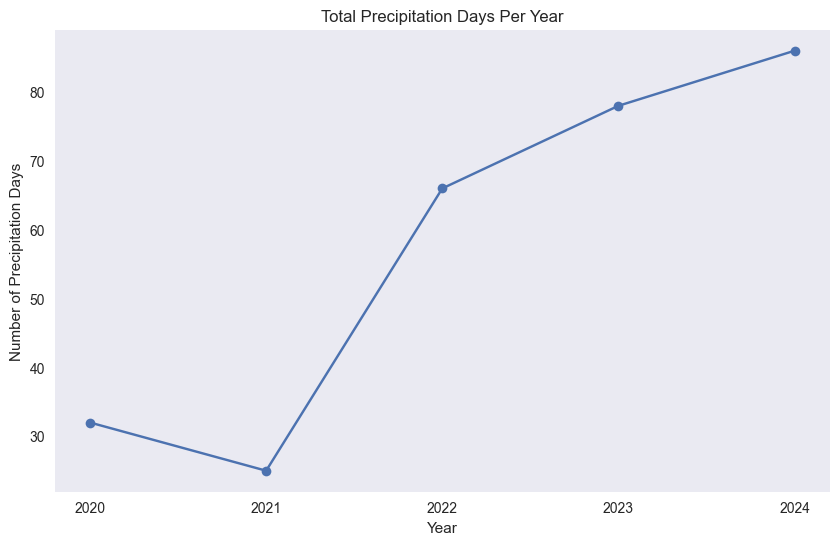

In [173]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(prcp_days.index, prcp_days.values, marker='o')
ax.set_title("Total Precipitation Days Per Year")
ax.set_xlabel("Year")
ax.set_ylabel("Number of Precipitation Days")
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.grid()
plt.show()


In [174]:
snowy_per_year = df[(df["tavg"] < 3) & (df["prcp"] > 0.5)].groupby("year")["prcp"].count()

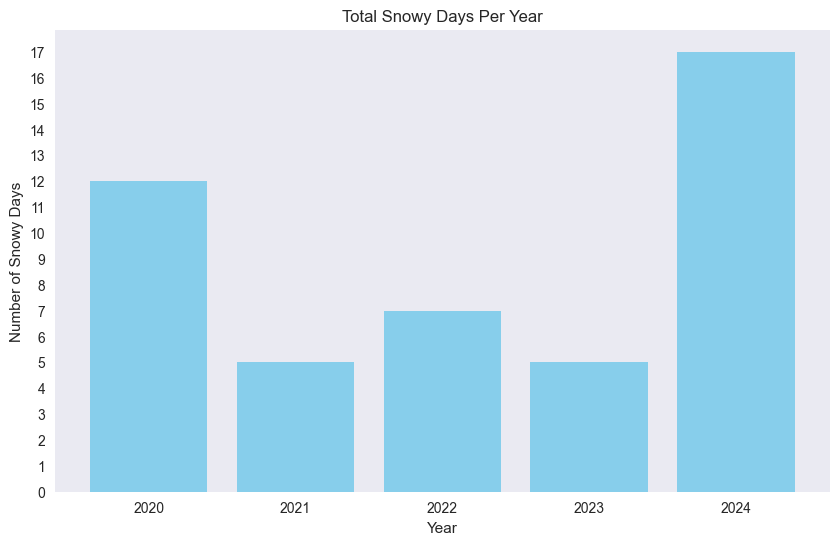

In [175]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(snowy_per_year.index, snowy_per_year.values, color='skyblue')
ax.set_title("Total Snowy Days Per Year")
ax.set_xlabel("Year")
ax.set_ylabel("Number of Snowy Days")
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.grid()
plt.show()


Visualizing the Rain

In [176]:
df['date'] = pd.to_datetime(df['date'])

rainy_days = df[df['prcp'] > 0.5][['date', 'prcp']].copy()

print(rainy_days.head())

         date  prcp
7  2020-01-08   1.8
12 2020-01-13   7.9
19 2020-01-20   2.0
20 2020-01-21   0.8
40 2020-02-10  23.9


In [177]:
# Preparing data for plotting
# We set everything to year 2000 so 29 Feb works fine
rainy_days['plot_date'] = rainy_days['date'].apply(lambda d: d.replace(year=2000))

# Extract the real year so we can group by it later
rainy_days['real_year'] = rainy_days['date'].dt.year

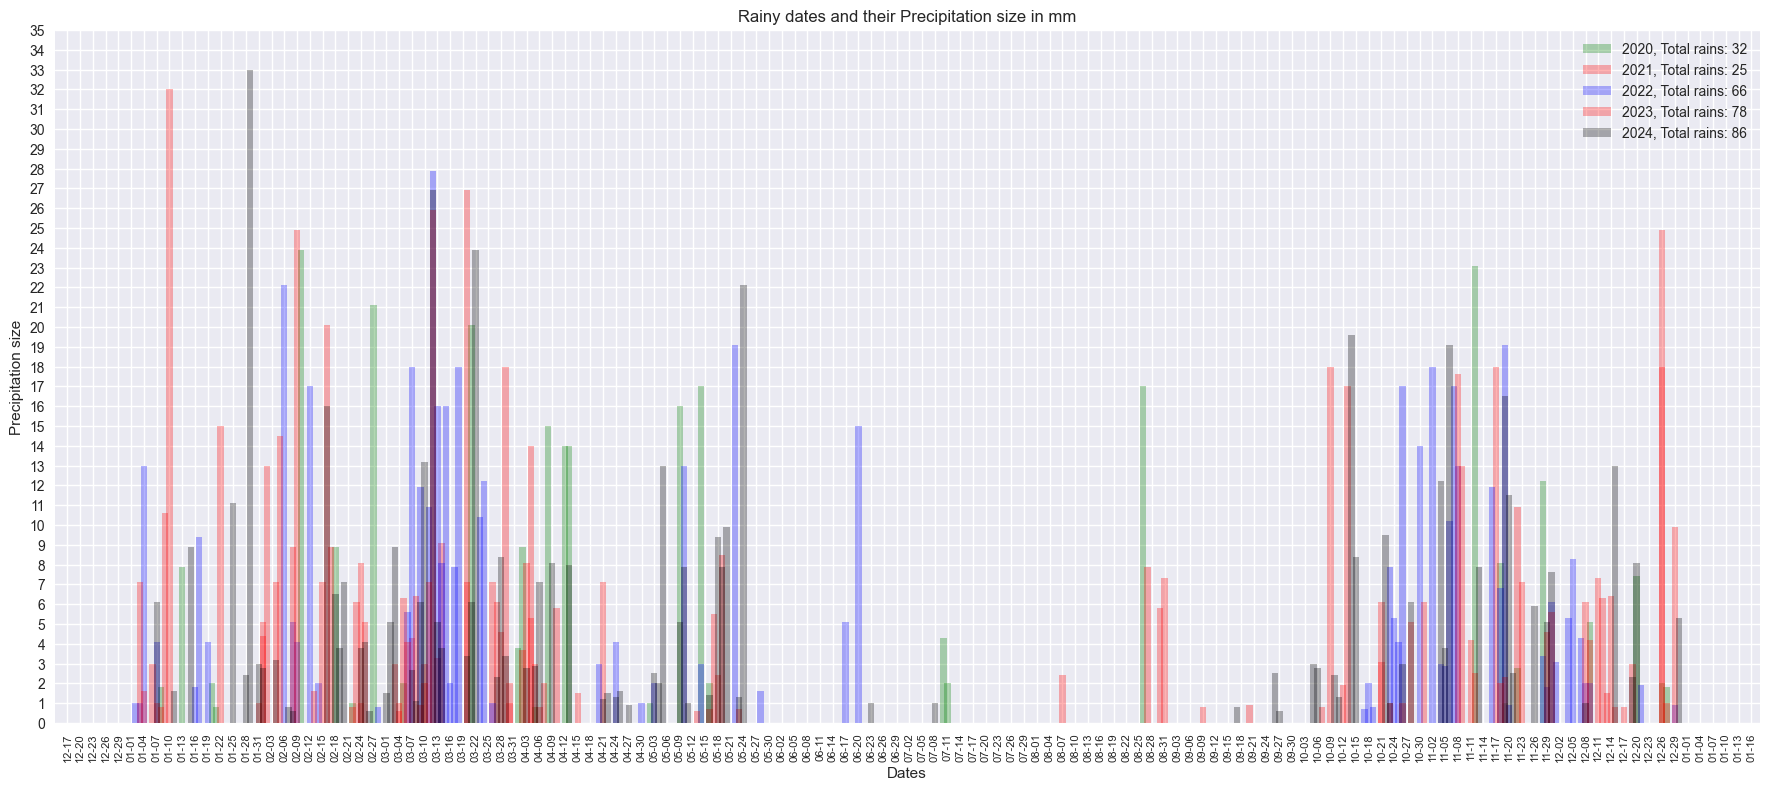

In [178]:
plt.style.use("seaborn-v0_8")
fig, ax = plt.subplots(figsize=(22, 9))

colors = {2020: 'green', 2021: 'red', 2022: 'blue', 2023: 'red', 2024: 'black'}

# Getting list of years present in data
years = sorted(rainy_days['real_year'].unique())

for year in years:
    # Getting data just for that year
    subset = rainy_days[rainy_days['real_year'] == year]
    # Visualizing
    ax.bar(subset['plot_date'], subset['prcp'], 
           label=f"{year}, Total rains: {len(subset)}",
           color=colors.get(year, 'gray'), # Gray if year not in color dict
           width=1.5, 
           alpha=0.3)

ax.set_ylim(0, 35)
ax.set_xlabel("Dates")
ax.set_ylabel("Precipitation size")
ax.set_title("Rainy dates and their Precipitation size in mm")
ax.legend()

ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
plt.xticks(rotation=90, size=8)

plt.show()